# Iris Dataset - SOFENN Example

Demonstrate multi-class classification with SOFENN on classic Iris Dataset

In [1]:
import numpy as np
import random as rnd

from sklearn import datasets
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

import keras
import keras.backend as K

from keras.optimizers import SGD
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input

from sofenn.FuzzyNetwork import FuzzyNetwork
#from sofenn.layers.DefuzzyLayer import DefuzzyLayer
from sofenn.layers import FuzzyLayer, NormalizedLayer, WeightedLayer, OutputLayer

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using TensorFlow backend.


## Read in and prep Iris Dataset

In [2]:
# read in iris dataset
iris = datasets.load_iris()
# create one-hot encoded vector for each class
Y = []
for y in iris.target:
    tmp = np.zeros(3)
    tmp[y] = 1
    Y.append(tmp)
Y = np.array(Y)
    
# split to train/test
X_train, X_test, y_train, y_test = train_test_split(iris.data, Y, test_size=0.1)

In [3]:
fuzz = FuzzyNetwork(
            X_train, X_test, y_train, y_test,           # data attributes
            neurons=5, max_neurons=100,                 # initialization parameters
            eval_thresh=0.5, ifpart_thresh=0.1354       # evaluation and ifpart threshold
            )

Building Fuzzy Network with 5 neurons...
Instructions for updating:
Colocations handled automatically by placer.
...Model successfully built!


In [4]:
fuzz.compile_model()

Compiling model...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Inputs (InputLayer)             (None, 4)            0                                            
__________________________________________________________________________________________________
FuzzyRules (FuzzyLayer)         (None, 5)            40          Inputs[0][0]                     
__________________________________________________________________________________________________
Normalization (NormalizedLayer) (None, 5)            0           FuzzyRules[0][0]                 
__________________________________________________________________________________________________
Weights (WeightedLayer)         (None, 5)            25          Inputs[0][0]                     
                                                                 Normalization[0][0]      

In [5]:
fuzz.train_model(epochs=150)

Training model...
Instructions for updating:
Use tf.cast instead.
Epoch 1/150
135/135 [==============================] - 1s 6ms/step - loss: 9.9836 - binary_accuracy: 0.6667
Epoch 2/150
135/135 [==============================] - 0s 123us/step - loss: 9.9035 - binary_accuracy: 0.6667
Epoch 3/150
135/135 [==============================] - 0s 153us/step - loss: 9.8295 - binary_accuracy: 0.6667
Epoch 4/150
135/135 [==============================] - 0s 247us/step - loss: 9.7461 - binary_accuracy: 0.6667
Epoch 5/150
135/135 [==============================] - 0s 233us/step - loss: 9.6841 - binary_accuracy: 0.6667
Epoch 6/150
135/135 [==============================] - 0s 122us/step - loss: 9.6050 - binary_accuracy: 0.6667
Epoch 7/150
135/135 [==============================] - 0s 279us/step - loss: 9.5311 - binary_accuracy: 0.6667
Epoch 8/150
135/135 [==============================] - 0s 230us/step - loss: 9.4709 - binary_accuracy: 0.6667
Epoch 9/150
135/135 [==============================] - 0

135/135 [==============================] - 0s 114us/step - loss: 4.8556 - binary_accuracy: 0.8494
Epoch 73/150
135/135 [==============================] - 0s 119us/step - loss: 5.0401 - binary_accuracy: 0.8494
Epoch 74/150
135/135 [==============================] - 0s 100us/step - loss: 4.9410 - binary_accuracy: 0.8469
Epoch 75/150
135/135 [==============================] - 0s 120us/step - loss: 4.9228 - binary_accuracy: 0.8469
Epoch 76/150
135/135 [==============================] - 0s 102us/step - loss: 4.9081 - binary_accuracy: 0.8469
Epoch 77/150
135/135 [==============================] - 0s 106us/step - loss: 4.8061 - binary_accuracy: 0.8444
Epoch 78/150
135/135 [==============================] - 0s 118us/step - loss: 4.7954 - binary_accuracy: 0.8444
Epoch 79/150
135/135 [==============================] - 0s 115us/step - loss: 4.8216 - binary_accuracy: 0.8444
Epoch 80/150
135/135 [==============================] - 0s 157us/step - loss: 4.8563 - binary_accuracy: 0.8444
Epoch 81/150
1

135/135 [==============================] - 0s 183us/step - loss: 3.6984 - binary_accuracy: 0.8593
Epoch 146/150
135/135 [==============================] - 0s 169us/step - loss: 3.5764 - binary_accuracy: 0.8593
Epoch 147/150
135/135 [==============================] - 0s 138us/step - loss: 3.5617 - binary_accuracy: 0.8593
Epoch 148/150
135/135 [==============================] - 0s 127us/step - loss: 3.5189 - binary_accuracy: 0.8593
Epoch 149/150
135/135 [==============================] - 0s 116us/step - loss: 3.5476 - binary_accuracy: 0.8593
Epoch 150/150
135/135 [==============================] - 0s 101us/step - loss: 3.4982 - binary_accuracy: 0.8568


In [6]:
fuzz._get_layer_weights('FuzzyRules')

[array([[ 5.3860927 ,  4.604973  ,  7.3920918 ,  7.2778225 ,  4.797637  ],
        [ 2.1738005 ,  2.822035  ,  2.3100164 ,  2.5404828 ,  4.106052  ],
        [ 2.954547  ,  2.716836  ,  5.561557  ,  6.332968  ,  1.3571987 ],
        [ 0.33963272,  0.3308408 ,  2.2554884 ,  2.983301  , -0.20228077]],
       dtype=float32),
 array([[3.3066323, 3.5249846, 3.5309515, 3.6224005, 3.5951087],
        [3.6017568, 4.332375 , 3.1668487, 3.5652883, 3.3726618],
        [3.0856993, 3.2640262, 3.3808053, 3.3924735, 3.3129518],
        [2.912371 , 3.0377088, 3.2492378, 3.2629805, 3.1735506]],
       dtype=float32)]

In [7]:
X_test

array([[6.7, 3. , 5.2, 2.3],
       [4.8, 3. , 1.4, 0.1],
       [5. , 3.5, 1.6, 0.6],
       [5.2, 3.4, 1.4, 0.2],
       [6.3, 2.3, 4.4, 1.3],
       [5.7, 4.4, 1.5, 0.4],
       [5.8, 2.7, 3.9, 1.2],
       [5. , 3.4, 1.6, 0.4],
       [5.7, 2.8, 4.1, 1.3],
       [5. , 3.4, 1.5, 0.2],
       [5.6, 2.9, 3.6, 1.3],
       [5.3, 3.7, 1.5, 0.2],
       [7.2, 3.2, 6. , 1.8],
       [5.8, 2.7, 5.1, 1.9],
       [6.6, 2.9, 4.6, 1.3]])

In [8]:
y_test

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [9]:
y_pred = fuzz.model.predict(X_test)
y_pred.round()

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 0.]], dtype=float32)

In [10]:
acc = y_test == y_pred.round()
acc

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True, False,  True],
       [ True,  True,  True],
       [ True, False,  True],
       [ True,  True,  True],
       [ True, False,  True],
       [ True,  True,  True],
       [ True, False,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True, False,  True]])

In [11]:
acc.sum() / acc.size

0.8888888888888888

## Model Prediction Results

In [12]:
pred_loss, pred_bin_acc = fuzz.model.evaluate(X_test, y_test)
print('Model Loss: {:0.8f}'.format(pred_loss))
print('Binary Accuracy: {:2.1f}%'.format(100*pred_bin_acc))

15/15 [==============================] - 0s 12ms/step
Model Loss: 1.40942073
Binary Accuracy: 88.9%


In [13]:
fuzz.model.metrics_names

['loss', 'binary_accuracy']

## Plot Results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


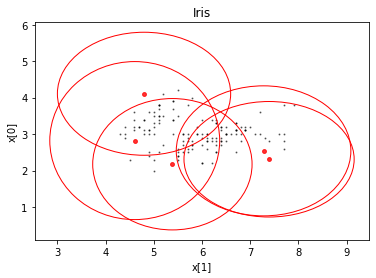

In [14]:
w = fuzz._get_layer_weights('FuzzyRules')


plt.clf()
plt.title('Iris')
plt.ylabel('x[0]')
plt.xlabel('x[1]')
plt.scatter([a[0] for a in X_train], [a[1] for a in X_train], c=(0,0,0), alpha=0.5,s=1)
for i in range(0,fuzz.neurons):
    ellipse = Ellipse((w[0][0][i], w[0][1][i]), w[1][0][i],w[1][1][i], color='r', fill=False)
    ax = plt.gca()
    ax.add_patch(ellipse)

plt.scatter(w[0][0], w[0][1], c=(1,0,0), alpha=0.8,s=15)
plt.show()